## Deterministics vs Stochastics Modelings


### Deterministics modeling allows us to calculate a future event exactly without the involvement of randomness. stochastics modeling allows us to calculate a future event exactly with the involvement of randomness. In determinstics there is each set of initial condition so there is only one trajectory. Through this model we get smooth curve. The difference with stochastics model is that stochastics model involves some random component.
### The trajectory of deterministics modeling is compeletly defined by the initial parameters and conditions due to no involvement of randomness but in stochastics modeling with the same parameters and same initial conditions we get different tracjectories running at different times.
### In computional biology one motive for using stochastics modeling is to calculate random variation in system which is not possible through determistics modelings. Here we will discuss about oscillating gene network same as above for stochastics modeling calculation.

### The differential equation for Stochastics Modelings:

$$\frac{dG_1}{dt} = \left[\frac{c^{n}}{c^{n} + G_{3}^{n}}\right]k_{1} - \gamma_{1}G_{1}$$
$$\frac{dG_2}{dt} = \left[\frac{G_{1}^{n}}{c^{n} + G_{1}^{n}}\right]k_{2} - \gamma_{2}G_{2}$$
$$\frac{dG_3}{dt} = \left[\frac{G_{2}^{n}}{c^{n} + G_{2}^{n}}\right]k_{3} - \gamma_{3}G_{3}$$

| Events                           | Rates                                                      |
| -------------------------------- | ---------------------------------------------------------- |
| $$G_{1} \rightarrow G_{1} + 1$$  | $$\left[\frac{c^{n}}{c^{n} + G_{3}^{n}}\right]k_{1}$$      |
| $$G_{1} \rightarrow G_{1} - 1$$  | $$\gamma_{1} G_{1}$$                                       |
| $$G_{2} \rightarrow G_{2} + 1$$  | $$ \left[\frac{G_{1}^{n}}{c^{n} + G_{1}^{n}}\right]k_{2}$$ |
| $$G_{2} \rightarrow G_{2} - 1$$  | $$\gamma_{2} G_{2}$$                                       |
| $$G_{3} \rightarrow G_{3} + 1$$  | $$ \left[\frac{G_{2}^{n}}{c^{n} + G_{2}^{n}}\right]k_{3}$$ |
| $$G_{3} \rightarrow G_{3} - 1$$  | $$\gamma_{3} G_{3}$$                                       |


### where
* $k_{1}$ is production rate of $G_{1}$
* $\gamma_{1}$ is degradation rate of $G_{1}$
* $k_{2}$ is production rate of $G_{2}$
* $\gamma_{2}$ is degradation rate of $G_{2}$
* $k_{3}$ is production rate of $G_{3}$
* $\gamma_{3}$ is degradation rate of $G_{3}$
* c = constant
* n =  hill constant 

In [27]:
# We need some modules (Python libraries) in the following.
# Usually, such modules are loaded in the first cell of a notebook.
# The modules that we need concern numerical calculations,
# solving the ordinary differential equations, and plotting them later.

# all plots should appear directly within the notebook
%matplotlib inline

# modules necessary for plotting
import matplotlib.pyplot as plt

# integrate a system of ordinary differential equations
# initial value problem
from scipy.integrate import odeint

# module to make available data structures and routines
# for numerics
import numpy as np
import random

In [28]:
G1 = [0] # Gene first time interval
G2 = [0] # Gene second time interval
G3 = [0] # Gene third time interval
t = [0] # time point of new event

In [29]:
tend = 1000

In [30]:
k_1 = 2
gamma_1 = 0.1
k_2 = 2
gamma_2 = 0.1
k_3 = 2
gamma_3 = 0.1
n = 9
c = 1

In [31]:
while t[-1] < tend: # -1 means last value of t array
    current_G1 = G1[-1]
    current_G2 = G2[-1]
    current_G3 = G3[-1]
    rates = [(c**n / (c**n + current_G3**n)) * k_1, gamma_1 * current_G1,\
    (current_G1**n / (c**n + current_G1**n)) * k_2, gamma_2 * current_G2,\
    (current_G2**n / (c**n + current_G2**n)) * k_3, gamma_3 * current_G3]
    rate_sum = sum(rates) # sum of the rates 
    tau = np.random.exponential(scale=1/rate_sum) # tau is the next point of time for event and the scale is the mean of distribution
    t.append(t[-1] + tau)
    rand = random.uniform(0,1) 
    if rand * rate_sum < rates[0]: # G1 production event 
            G1.append(G1[-1] + 1)
            G2.append(G2[-1])
            G3.append(G3[-1])
    elif rand * rate_sum > rates[0] and rand * rate_sum < sum(rates[:2]): # G1 decay event 
            G1.append(G1[-1] - 1)
            G2.append(G2[-1])
            G3.append(G3[-1])
    elif rand * rate_sum > sum(rates[:2]) and rand * rate_sum < sum(rates[:3]):# G2 production event
            G1.append(G1[-1])
            G2.append(G2[-1] + 1)
            G3.append(G3[-1])
    elif rand * rate_sum > sum(rates[:3]) and rand * rate_sum < sum(rates[:4]): # G2 decay event 
            G1.append(G1[-1])
            G2.append(G2[-1] - 1)
            G3.append(G3[-1])
    elif rand * rate_sum > sum(rates[:4]) and rand * rate_sum < sum(rates[:5]): # G3 production event
            G1.append(G1[-1])
            G2.append(G2[-1] )
            G3.append(G3[-1] + 1)
    elif rand * rate_sum > sum(rates[:5]) and rand * rate_sum < sum(rates[:6]): # G3 decay event
            G1.append(G1[-1])
            G2.append(G2[-1] )
            G3.append(G3[-1] - 1)

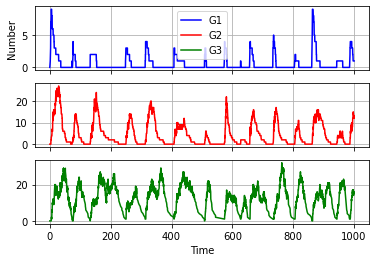

In [32]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=False)
line1, = ax1.plot(t , G1, color="b",label="G1")
line2, = ax2.plot(t , G2, color="r",label="G2")
line3, = ax3.plot(t , G3, color="g",label="G3")
ax1.set_ylabel("Number")
ax3.set_xlabel("Time")
ax1.legend(handles=[line1,line2,line3])
ax1.grid()
ax2.grid()
ax3.grid()
#plt.show()
plt.savefig("Stochastic_Oscillator_1.pdf", dpi=400,  bbox_inches='tight')


## Observation

### The above figure shows the relation between Gene first ($G_{1}$) , Gene second($G_{2}$) and Gene third($G_{3}$)  over time. Along the x-axis, we have the time axis and along y-axis we have number of Gene first ($G_{1}$), Gene second$G_{2}$ and Gene 3($G_{3}$).  We observe that $G_{1}$(blue line) denotes Gene first, $G_{2}$(red line) denotes Gene second and $G_{3}$(green line) denotes Gene third. Each one have the oscillations but there is unevenly space because of the stochastic nature of this model. In compared to previous oscillator topic we did determistic ode model which was smooth but this is stochastic so they are still oscillating but it is much more random. 

## Changing the initial parameters

In [33]:
G1 = [0] # Gene first time interval
G2 = [0] # Gene second time interval
G3 = [0] # Gene third time interval
t = [0] # time point of new event

In [34]:
tend = 1000

In [35]:
k_1 = 3
gamma_1 = 0.2
k_2 = 2.5
gamma_2 = 0.2
k_3 = 3
gamma_3 = 0.2
n = 10
c = 2

In [36]:
while t[-1] < tend: # -1 means last value of t array
    current_G1 = G1[-1]
    current_G2 = G2[-1]
    current_G3 = G3[-1]
    rates = [(c**n / (c**n + current_G3**n)) * k_1, gamma_1 * current_G1,\
    (current_G1**n / (c**n + current_G1**n)) * k_2, gamma_2 * current_G2,\
    (current_G2**n / (c**n + current_G2**n)) * k_3, gamma_3 * current_G3]
    rate_sum = sum(rates) # sum of the rates 
    tau = np.random.exponential(scale=1/rate_sum) # tau is the next point of time for event and the scale is the mean of distribution
    t.append(t[-1] + tau)
    rand = random.uniform(0,1) 
    if rand * rate_sum < rates[0]: # G1 production event 
            G1.append(G1[-1] + 1)
            G2.append(G2[-1])
            G3.append(G3[-1])
    elif rand * rate_sum > rates[0] and rand * rate_sum < sum(rates[:2]): # G1 decay event 
            G1.append(G1[-1] - 1)
            G2.append(G2[-1])
            G3.append(G3[-1])
    elif rand * rate_sum > sum(rates[:2]) and rand * rate_sum < sum(rates[:3]):# G2 production event
            G1.append(G1[-1])
            G2.append(G2[-1] + 1)
            G3.append(G3[-1])
    elif rand * rate_sum > sum(rates[:3]) and rand * rate_sum < sum(rates[:4]): # G2 decay event 
            G1.append(G1[-1])
            G2.append(G2[-1] - 1)
            G3.append(G3[-1])
    elif rand * rate_sum > sum(rates[:4]) and rand * rate_sum < sum(rates[:5]): # G3 production event
            G1.append(G1[-1])
            G2.append(G2[-1] )
            G3.append(G3[-1] + 1)
    elif rand * rate_sum > sum(rates[:5]) and rand * rate_sum < sum(rates[:6]): # G3 decay event
            G1.append(G1[-1])
            G2.append(G2[-1] )
            G3.append(G3[-1] - 1)

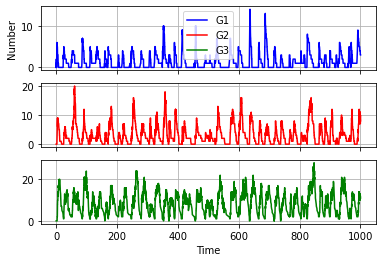

In [37]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=False)
line1, = ax1.plot(t , G1, color="b",label="G1")
line2, = ax2.plot(t , G2, color="r",label="G2")
line3, = ax3.plot(t , G3, color="g",label="G3")
ax1.set_ylabel("Number")
ax3.set_xlabel("Time")
ax1.legend(handles=[line1,line2,line3])
ax1.grid()
ax2.grid()
ax3.grid()
#plt.show()
plt.savefig("Stochastic_Oscillator_2.pdf", dpi=400,  bbox_inches='tight')


### If we change the initial parameters of $k_1$, $\gamma_1$, $k_{2}$, $\gamma_{2}$, $k_3$ and $\gamma_3$ greater than above we came to know that the nature of oscillation of all Gene remain same but peak points of the all Gene varies from first figure and some what genes oscillates in rapid speed in less time.
